In [ ]:
#import libraries
import glob 
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('dataset.csv',sep=';')

#print the first 5 rows

print(df)

Saving dataset.csv to dataset.csv
         Elementary lesion  Color Homogene  ... Alcohol      Diagnosis Dysplasia
0     No loss of substance  White       No  ...      No            LPB        No
1     No loss of substance  White      Yes  ...      No            LPB        No
2     No loss of substance  White      Yes  ...      No            LPB        No
3     No loss of substance  White      Yes  ...      No  LEUCOKERATOSE        No
4     No loss of substance  White      Yes  ...      No  LEUCOKERATOSE        No
...                    ...    ...      ...  ...     ...            ...       ...
2357  No loss of substance    Red       No  ...      No      GINGIVITE        No
2358  No loss of substance    Red      Yes  ...      No      GINGIVITE        No
2359  No loss of substance    Red      Yes  ...      No      GINGIVITE        No
2360  No loss of substance    Red      Yes  ...      No            LPB        No
2361  No loss of substance    Red      Yes  ...      No            LPB     

In [ ]:

df.head()

,Elementary lesion,Color,Homogene,Well_Delimited,Reticulated,Bourgeonnant,Papillomatous,Age,Sex,Tobacco,Stupefies,Alcohol,Diagnosis,Dysplasia
0,No loss of substance,White,No,Yes,No,No,No,73.0,F,0.0,No,No,LPB,No
1,No loss of substance,White,Yes,Yes,Yes,No,No,73.0,F,0.0,No,No,LPB,No
2,No loss of substance,White,Yes,Yes,Yes,No,No,73.0,F,0.0,No,No,LPB,No
3,No loss of substance,White,Yes,Yes,No,No,No,75.0,M,0.0,No,No,LEUCOKERATOSE,No
4,No loss of substance,White,Yes,Yes,No,No,No,75.0,M,0.0,No,No,LEUCOKERATOSE,No


In [ ]:
#create a list of column names to keep
columns_to_retain = ['Elementary lesion','Homogene', 'Reticulated', 'Age', 'Sex', 'Tobacco', 'Stupefies', 'Alcohol', 'Diagnosis', 'Dysplasia']

#drop the columns that are not in columns_to_retain
df = df.drop( [col for col in df.columns if not col in columns_to_retain], axis=1 )

#drop the rows with na or missing values
df = df.dropna(axis=0)
df.tail()






,Elementary lesion,Homogene,Reticulated,Age,Sex,Tobacco,Stupefies,Alcohol,Diagnosis,Dysplasia
2357,No loss of substance,No,No,23.0,F,0.0,No,No,GINGIVITE,No
2358,No loss of substance,Yes,No,23.0,F,0.0,No,No,GINGIVITE,No
2359,No loss of substance,Yes,No,23.0,F,0.0,No,No,GINGIVITE,No
2360,No loss of substance,Yes,No,67.0,M,0.0,No,No,LPB,No
2361,No loss of substance,Yes,No,81.0,M,0.0,No,No,LPB,No


In [ ]:
#transfrom the non-numeric data in the columns

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  else:
    df[column] = LabelEncoder().fit_transform( df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [ ]:
df.head()

,Elementary lesion,Homogene,Reticulated,Age,Sex,Tobacco,Stupefies,Alcohol,Diagnosis,Dysplasia
0,2,0,0,73.0,0,0.0,0,0,21,0
1,2,1,1,73.0,0,0.0,0,0,21,0
2,2,1,1,73.0,0,0.0,0,0,21,0
3,2,1,0,75.0,1,0.0,0,0,20,0
4,2,1,0,75.0,1,0.0,0,0,20,0


In [ ]:
#split the data into independent (x) dataset (the features) and dependent (y) dataset (the target)
X = df.drop(['Diagnosis'], axis=1)
y1 = df['Diagnosis']
y = pd.get_dummies(y1).values



In [ ]:
#split the data into 80% training and 20% testing & shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#build the model
model = Sequential()
model.add( Dense(9, input_shape= (9,), activation='relu'))
model.add( Dense(39, activation='softmax') )


In [ ]:
#compile the model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#train the model


history = model.fit(X_train, y_train, epochs = 2000, batch_size= X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.1055 - accuracy: 0.6483
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.1053 - accuracy: 0.6483
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.1051 - accuracy: 0.6483
Epoch 4/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.1050 - accuracy: 0.6483
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.1048 - accuracy: 0.6483
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.1046 - accuracy: 0.6483
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.1045 - accuracy: 0.6483
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.1043 - accuracy: 0.6483
Epoch 9/2000
1/1 [==============================] - 0s 17ms/step - loss: 1.1042 - accuracy: 0.6483
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.1040 - accuracy: 0.6483
Epoch 11/2000
1/1 

In [ ]:

model.save('diagnosis.model')

INFO:tensorflow:Assets written to: diagnosis.model/assets


Text(0.5, 0, 'epoch')

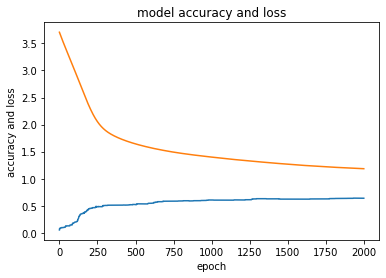

In [ ]:
#Visualize the model loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')


In [ ]:
#Get the shape of the training and testing data set
print('shape of training data:', X_train.shape)
print('shape of test data:', X_test.shape)


shape of training data: (1669, 9)
shape of test data: (418, 9)


In [ ]:
score = model.evaluate(X_test, y_test, batch_size=X_train.shape[0])

1/1 [==============================] - 0s 16ms/step - loss: 1.2555 - accuracy: 0.6196
